In [2]:
%run ../../import_src.py

import lymedata
from lymedata import *
import constants
from constants import *

import matplotlib.pyplot as plt

/home/reu24lyme/alex/code_lib/src/lymedata.py:74: DtypeWarning: Columns (224,249,259,269,274,294,299,304,309,339,344,365,369,373,377,395,399,403,411,415,419,423,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Both Neuro and Mus: 2259
Only Neuro: 310
Only Mus: 762
Neither Neuro nor Mus: 632
Dropping 99
(1619, 7)
Index(['Bio Sex', 'Disability', 'Mental Health Days', 'Physical Health Days',
       'Bed Days', 'non_neuro', 'neuro'],
      dtype='object')
Neuro group: 1119
Non-Neuro group: 500


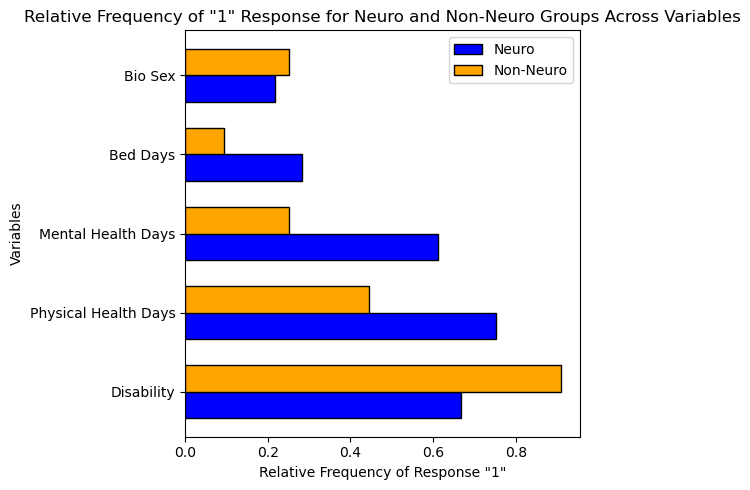

In [3]:
# Days Statistics (all Add'l Circumstnaces)
# -Bed days
# -Mental health days
# -Physical health days
# -Disability
# -Bio sex

# Coinfections Statistcs (all Diagnostic Circumstances)
# -Babesia
# -Bartonella
# -Erlichia
# -Mycoplasma
# -Rikettsia
# Tick-borne coinfections

# Days Statistics
# Sanity check: the following has the same neuro/musculo/both/neither counts as if all columns were specified.
data = LymeData({CHRONIC, NEURO, NON_NEURO},{ADDL_CIR},{NEURO, NON_NEURO}, individual_cols={'Bio Sex','Bed Days',
       'Mental Health Days', 'Physical Health Days', 'Disability'}, defn=DEF_CNS1, drop_99=True)
print(data.df.shape)
print(data.df.columns)

# Based on: Jiayue Liu/Additional Circumstances Statistics after Binning.ipynb
variables = ['Bio Sex','Bed Days',
       'Mental Health Days', 'Physical Health Days', 'Disability']

variables.reverse() # Reverse variable list (for display purposes)

# Calculate frequence of 1 for each variable, Neuro group
neuro_group = data.df[data.df[NEURO] == 1]
# Calculate frequence of 1 for each variable, Non-Neuro group
non_neuro_group = data.df[data.df[NON_NEURO] == 1]

neuro_total = len(neuro_group)
non_neuro_total = len(non_neuro_group)
print(f'Neuro group: {neuro_total}')
print(f'Non-Neuro group: {non_neuro_total}')

# Store counts of 1 for each variable in both groups
neuro_counts = [neuro_group[var].sum()/neuro_total for var in variables]
non_neuro_counts = [non_neuro_group[var].sum()/non_neuro_total for var in variables]

# Create bar chart
gap = 0.5
y = np.arange(len(variables)) * (1 + gap)# label locations
width = 0.5

fig, ax = plt.subplots(figsize=(6,5))
bars1 = ax.barh(y-width/2, neuro_counts, width, label='Neuro', color='blue', edgecolor='black')
bars2 = ax.barh(y + width/2, non_neuro_counts, width, label='Non-Neuro', color='orange', edgecolor='black')

# Add labels and title
ax.set_ylabel('Variables')
ax.set_xlabel('Relative Frequency of Response "1"')
ax.set_title('Relative Frequency of "1" Response for Neuro and Non-Neuro Groups Across Variables')
ax.set_yticks(y)
ax.set_yticklabels(variables)  # Keep variable names horizontal
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [3]:
data = LymeData({CHRONIC, NEURO, NON_NEURO},{DIAG_CIR},{NEURO, NON_NEURO}, defn=DEF_CNS1, drop_99=True)
print(data.df.shape)
print(data.df.columns)


Both Neuro and Mus: 2259
Only Neuro: 310
Only Mus: 762
Neither Neuro nor Mus: 632
Dropping 99
(1982, 14)
Index(['recall a tick bite', 'length of time noticed tick bite',
       'treated with antibiotics', 'length of time treated for tick bite',
       'period of time for diagnosis', 'misdiagnosis', 'tick born coinfection',
       'Babesia', 'Bartonella', 'Ehrlichia/ Anaplasma', 'Mycoplasma',
       'Rickettsia', 'non_neuro', 'neuro'],
      dtype='object')


/home/reu24lyme/alex/code_lib/src/lymedata.py:74: DtypeWarning: Columns (224,249,259,269,274,294,299,304,309,339,344,365,369,373,377,395,399,403,411,415,419,423,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


/home/reu24lyme/alex/code_lib/src/lymedata.py:74: DtypeWarning: Columns (224,249,259,269,274,294,299,304,309,339,344,365,369,373,377,395,399,403,411,415,419,423,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Both Neuro and Mus: 2259
Only Neuro: 310
Only Mus: 762
Neither Neuro nor Mus: 632
Dropping 99
(1982, 8)
Index(['tick born coinfection', 'Mycoplasma', 'Rickettsia',
       'Ehrlichia/ Anaplasma', 'Babesia', 'Bartonella', 'non_neuro', 'neuro'],
      dtype='object')
Neuro group: 1276
Non-Neuro group: 706


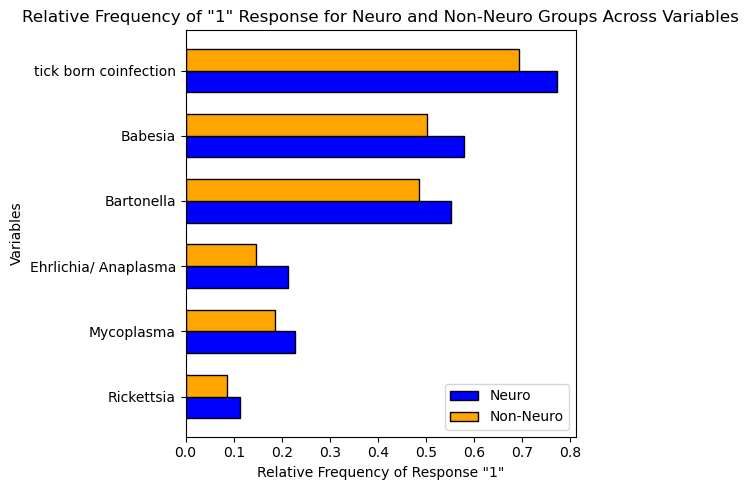

In [4]:
# Coinfections Statistics
# Sanity check: the following has the same neuro/musculo/both/neither counts as if all columns were specified.
data = LymeData({CHRONIC, NEURO, NON_NEURO},{DIAG_CIR},{NEURO, NON_NEURO}, individual_cols={'tick born coinfection',
       'Babesia', 'Bartonella', 'Ehrlichia/ Anaplasma', 'Mycoplasma',
       'Rickettsia'}, defn=DEF_CNS1, drop_99=True)
print(data.df.shape)
print(data.df.columns)

# Based on: Jiayue Liu/Additional Circumstances Statistics after Binning.ipynb
variables = ['tick born coinfection',
       'Babesia', 'Bartonella', 'Ehrlichia/ Anaplasma', 'Mycoplasma',
       'Rickettsia']

variables.reverse() # Reverse variable list (for display purposes)

# Calculate frequence of 1 for each variable, Neuro group
neuro_group = data.df[data.df[NEURO] == 1]
# Calculate frequence of 1 for each variable, Non-Neuro group
non_neuro_group = data.df[data.df[NON_NEURO] == 1]

neuro_total = len(neuro_group)
non_neuro_total = len(non_neuro_group)
print(f'Neuro group: {neuro_total}')
print(f'Non-Neuro group: {non_neuro_total}')

# Store counts of 1 for each variable in both groups
neuro_counts = [neuro_group[var].sum()/neuro_total for var in variables]
non_neuro_counts = [non_neuro_group[var].sum()/non_neuro_total for var in variables]

# Create bar chart
gap = 0.5
y = np.arange(len(variables)) * (1 + gap)# label locations
width = 0.5

fig, ax = plt.subplots(figsize=(6,5))
bars1 = ax.barh(y-width/2, neuro_counts, width, label='Neuro', color='blue', edgecolor='black')
bars2 = ax.barh(y + width/2, non_neuro_counts, width, label='Non-Neuro', color='orange', edgecolor='black')

# Add labels and title
ax.set_ylabel('Variables')
ax.set_xlabel('Relative Frequency of Response "1"')
ax.set_title('Relative Frequency of "1" Response for Neuro and Non-Neuro Groups Across Variables')
ax.set_yticks(y)
ax.set_yticklabels(variables)  # Keep variable names horizontal
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

/home/reu24lyme/alex/code_lib/src/lymedata.py:74: DtypeWarning: Columns (224,249,259,269,274,294,299,304,309,339,344,365,369,373,377,395,399,403,411,415,419,423,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Both Neuro and Mus: 2259
Only Neuro: 310
Only Mus: 762
Neither Neuro nor Mus: 632
Dropping 99
(1982, 8)
Index(['Bartonella', 'Ehrlichia/ Anaplasma', 'Rickettsia',
       'tick born coinfection', 'Mycoplasma', 'Babesia', 'neuro', 'non_neuro'],
      dtype='object')
neuro group: 1276
non_neuro group: 706


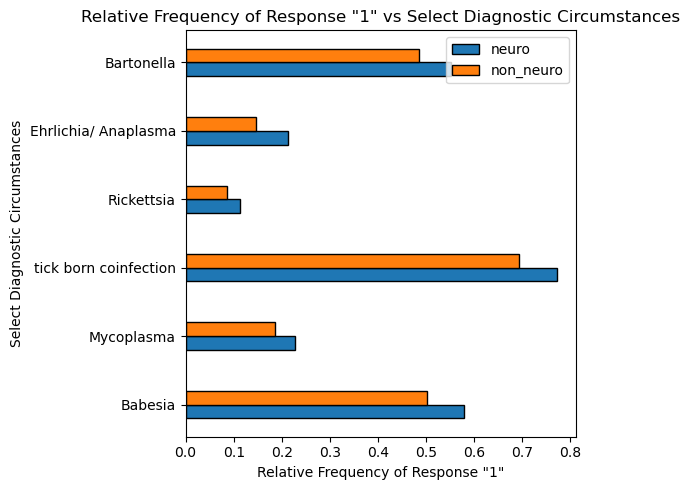

In [3]:
import display_stats
from display_stats import *

# Coinfections Statistics
# Sanity check: the following has the same neuro/musculo/both/neither counts as if all columns were specified.
data = LymeData({CHRONIC, NEURO, NON_NEURO},{DIAG_CIR},{NEURO, NON_NEURO}, individual_cols={'tick born coinfection',
       'Babesia', 'Bartonella', 'Ehrlichia/ Anaplasma', 'Mycoplasma',
       'Rickettsia'}, defn=DEF_CNS1, drop_99=True)
print(data.df.shape)
print(data.df.columns)

display_stats(data, xlabel='Relative Frequency of Response "1"', ylabel='Select Diagnostic Circumstances')

/home/reu24lyme/alex/code_lib/src/lymedata.py:74: DtypeWarning: Columns (224,249,259,269,274,294,299,304,309,339,344,365,369,373,377,395,399,403,411,415,419,423,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Both Neuro and Mus: 2259
Only Neuro: 310
Only Mus: 762
Neither Neuro nor Mus: 632
Dropping 99
(1982, 10)
Index(['Bartonella', 'Ehrlichia/ Anaplasma', 'Rickettsia',
       'tick born coinfection', 'Mycoplasma', 'Babesia', 'musculo', 'both',
       'neuro', 'neither'],
      dtype='object')
musculo group: 387
both group: 1107
neuro group: 169
neither group: 319


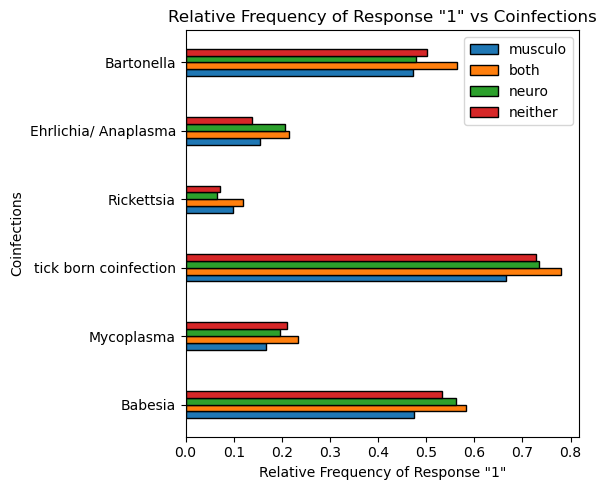

In [4]:
import display_stats
from display_stats import *

# Coinfections Statistics
# Sanity check: the following has the same neuro/musculo/both/neither counts as if all columns were specified.
data = LymeData({CHRONIC, NEURO, MUSCULO},{DIAG_CIR},{NEURO, MUSCULO, BOTH, NEITHER}, individual_cols={'tick born coinfection',
       'Babesia', 'Bartonella', 'Ehrlichia/ Anaplasma', 'Mycoplasma',
       'Rickettsia'}, defn=DEF_CNS1, drop_99=True)
print(data.df.shape)
print(data.df.columns)

display_stats(data, xlabel='Relative Frequency of Response "1"', ylabel='Coinfections')

/home/reu24lyme/alex/code_lib/src/lymedata.py:74: DtypeWarning: Columns (224,249,259,269,274,294,299,304,309,339,344,365,369,373,377,395,399,403,411,415,419,423,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Both Neuro and Mus: 2259
Only Neuro: 310
Only Mus: 762
Neither Neuro nor Mus: 632
Dropping 99
(1619, 9)
Index(['Bio Sex', 'Physical Health Days', 'Disability', 'Bed Days',
       'Mental Health Days', 'neither', 'neuro', 'musculo', 'both'],
      dtype='object')
Select cols ['neither', 'neuro', 'musculo', 'both']
neither group: 152
neuro group: 140
musculo group: 348
both group: 979
total cols 4


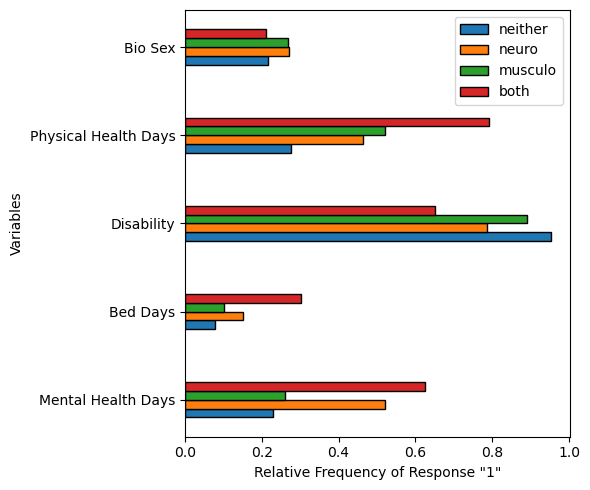

In [8]:
# Days Statistics
# Sanity check: the following has the same neuro/musculo/both/neither counts as if all columns were specified.
data = LymeData({CHRONIC, NEURO, MUSCULO},{ADDL_CIR},{NEURO, MUSCULO, BOTH, NEITHER}, individual_cols={'Bio Sex','Bed Days',
       'Mental Health Days', 'Physical Health Days', 'Disability'}, defn=DEF_CNS1, drop_99=True)
print(data.df.shape)
print(data.df.columns)
display_stats(data, xlabel='Relative Frequency of Response "1"', ylabel='Variables')